# Cab-Lab

Welcome to Cab_Lab demo. In this notebook, a demonstration on how to access the data cube is presented.

In [1]:
from cablab import Cube
from cablab import CubeData
from datetime import datetime

Specify the cube location. This is the directory where "data" directory and "cube.config" file are located.

In [2]:
cube = Cube.open("C:\\Users\\gunnar\\src\\CABLAB\\testcube")
cube_reader = CubeData(cube)

In [3]:
cube_reader.variable_names

{'BurntArea': 0, 'Emission': 1, 'Ozone': 2, 'Precip': 3, 'SoilMoisture': 4}

##### Get the cube's data.

get(variable=None, time=None, latitude=None, longitude=None)

**variable** an variable index or name or an iterable returning multiple of these (var1, var2, ...)

**time:** a single datetime.datetime object or a 2-element iterable (time_start, time_end)

**latitude:** a single latitude value or a 2-element iterable (latitude_start, latitude_end)

**longitude:** a single longitude value or a 2-element iterable (longitude_start, longitude_end)

**return:** a dictionary mapping variable names --> data arrays of dimension (time, latitude, longitude)

##### Get complete geo-location at a specific time

In [4]:
precip_specific_time = cube_reader.get('Precip', datetime(2002,1,1))

##### Get complete time-series for the specified geo-location.

In [5]:
precip_specific_area = cube_reader.get("Precip", None, (0,10), (10,20))

In [6]:
precip_specific_area[0].shape

(457, 40, 40)

In [7]:
cube.close()

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

##### And a time series

c:\python35\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


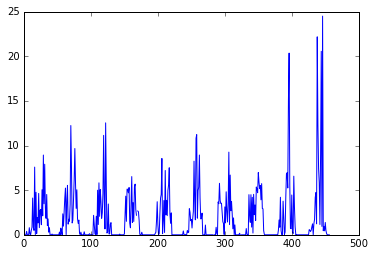

In [10]:
precip_specific_area[0][precip_specific_area[0]<0]=float('NaN')
plt.plot(precip_specific_area[0][:,2,3]);

##### Multivariate plots

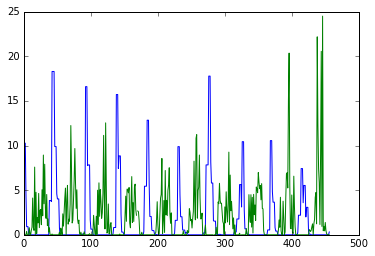

In [11]:
emission_specific_area = cube_reader.get('Emission', None, (0,10), (10,20))
plt.plot(range(0,457),emission_specific_area[0][:,2,3]/3,"-",precip_specific_area[0][:,2,3],"-");

In [12]:
from mpl_toolkits.basemap import Basemap
import numpy as np

In [13]:
lon = np.linspace(-180,180,1440)
lat = np.linspace(90,-90,720)
lons, lats = np.meshgrid(lon,lat)

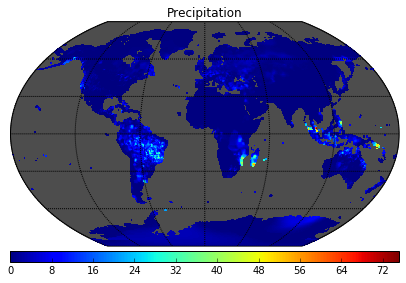

In [14]:
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m = Basemap(projection='kav7',lon_0=0,resolution=None)
m.drawmapboundary(fill_color='0.3')
im1 = m.pcolormesh(lons,lats,precip_specific_time[0],shading='flat',cmap=plt.cm.jet,latlon=True)
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
ax.set_title('Precipitation')